In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv(r"C:\Users\Soham Gon\Desktop\blinkit analysis\Data\csv\blinkit_customer_feedback.csv")
df.head()

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20


In [2]:
df.shape

(5000, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   feedback_id        5000 non-null   int64 
 1   order_id           5000 non-null   int64 
 2   customer_id        5000 non-null   int64 
 3   rating             5000 non-null   int64 
 4   feedback_text      5000 non-null   object
 5   feedback_category  5000 non-null   object
 6   sentiment          5000 non-null   object
 7   feedback_date      5000 non-null   object
dtypes: int64(4), object(4)
memory usage: 312.6+ KB


In [4]:
df.duplicated().sum()

np.int64(0)

In [15]:
sentiment_counts = df.groupby('sentiment').size().reset_index(name='count')
sentiment_counts['feedback_share_pct'] = (sentiment_counts['count'] / sentiment_counts['count'].sum()) * 100
sentiment_counts

,sentiment,count,feedback_share_pct
0,Negative,1642,32.84
1,Neutral,1738,34.76
2,Positive,1620,32.40


In [29]:
# judging feedback category.
df.groupby('feedback_category')['rating'].mean().reset_index(name="avg_rating")

,feedback_category,avg_rating
0,App Experience,3.361913
1,Customer Service,3.368088
2,Delivery,3.332809
3,Product Quality,3.315200


In [ ]:
# rating count.
rating_count = df.groupby('rating').size().reset_index(name='rating_count').sort_values(by='rating_count', ascending=False)
rating_count['rating_share'] = (rating_count['rating_count'] / rating_count['rating_count'].sum()) * 100
rating_count

,rating,rating_count,rating_share
3,4,1708,34.16
2,3,1398,27.96
4,5,816,16.32
0,1,540,10.80
1,2,538,10.76


In [23]:
df.head()

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20


In [31]:
# creating separate year, month, day_name, and period columns.
df['feedback_date'] = pd.to_datetime(df['feedback_date'], format = '%Y-%m-%d')

df['feedback_year'] = df['feedback_date'].dt.year
df['feedback_month'] = df['feedback_date'].dt.month
df['feedback_day_name'] = df['feedback_date'].dt.strftime('%a')
df['feedback_week'] = df['feedback_date'].dt.isocalendar().week
df['feedback_period'] = df['feedback_date'].dt.to_period('W')
df['feedback_day'] = df['feedback_date'].dt.day

In [32]:
df.head()

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date,feedback_year,feedback_month,feedback_day_name,feedback_week,feedback_period,feedback_day
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17,2024,7,Wed,29,2024-07-15/2024-07-21,17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28,2024,5,Tue,22,2024-05-27/2024-06-02,28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23,2024,9,Mon,39,2024-09-23/2024-09-29,23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24,2023,11,Fri,47,2023-11-20/2023-11-26,24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20,2023,11,Mon,47,2023-11-20/2023-11-26,20


In [33]:
# yearwise sentimental rating
df.groupby('sentiment').size().reset_index(name="rating_count")

,sentiment,rating_count
0,Negative,1642
1,Neutral,1738
2,Positive,1620


<Axes: title={'center': 'yearly sentimenal count per order'}, xlabel='feedback_year'>

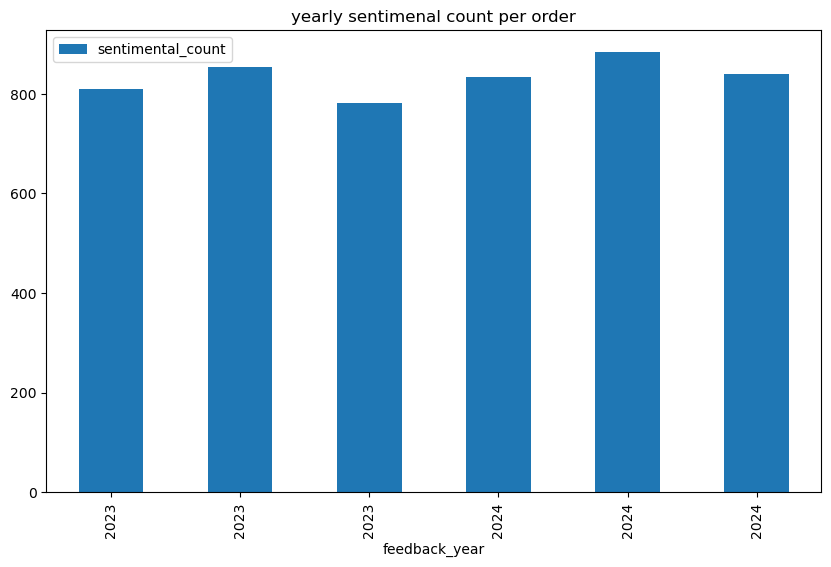

In [37]:
df.groupby(['feedback_year', 'sentiment']).size().reset_index(name='sentimental_count').plot(x = 'feedback_year', y ='sentimental_count', kind = 'bar', figsize=(10, 6), title="yearly sentimenal count per order")

In [38]:
df.to_csv(r"C:\Users\Soham Gon\Desktop\blinkit analysis\Data\cleaned\blinkit_customer_feedback_cleaned.csv", index=False)
print("customer feedback csv saved after cleaned!")

customer feedback csv saved after cleaned!
